In [2]:
import yfinance as yf # import Yahoo finance data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')


In [3]:
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day) # We will examine data from when Bitcoin got introduced as a stock.
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-04-19,85063.414062,85597.703125,84353.460938,84450.867188,15259300427
2025-04-20,85174.304688,85306.382812,83976.843750,85066.070312,14664050812
2025-04-21,87518.906250,88460.093750,85143.835938,85171.539062,41396190190
2025-04-22,93441.890625,93817.382812,87084.531250,87521.875000,55899038456
2025-04-23,93793.898438,94391.820312,92145.601562,93466.117188,50647085056


In [6]:
stock_data.describe().T # Tells us some statistics about our data using wide format

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3872.0,2.168427e+04,2.497161e+04,1.781030e+02,1.751128e+03,9.688292e+03,3.545816e+04,1.061463e+05
High,BTC-USD,3872.0,2.214252e+04,2.547995e+04,2.117310e+02,1.812943e+03,9.872993e+03,3.640883e+04,1.091149e+05
Low,BTC-USD,3872.0,2.115688e+04,2.439147e+04,1.715100e+02,1.692143e+03,9.477201e+03,3.407282e+04,1.052917e+05
Open,BTC-USD,3872.0,2.166135e+04,2.494851e+04,1.768970e+02,1.737957e+03,9.683971e+03,3.542500e+04,1.061473e+05
Volume,BTC-USD,3872.0,1.929346e+10,2.083195e+10,5.914570e+06,7.567137e+08,1.542065e+10,3.048570e+10,3.509679e+11


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2014-09-17 to 2025-04-23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3872 non-null   float64
 1   (High, BTC-USD)    3872 non-null   float64
 2   (Low, BTC-USD)     3872 non-null   float64
 3   (Open, BTC-USD)    3872 non-null   float64
 4   (Volume, BTC-USD)  3872 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.5 KB


In [8]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [9]:
# Close price data

closing_price = stock_data[['Close']]

In [10]:
closing_price.head()

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


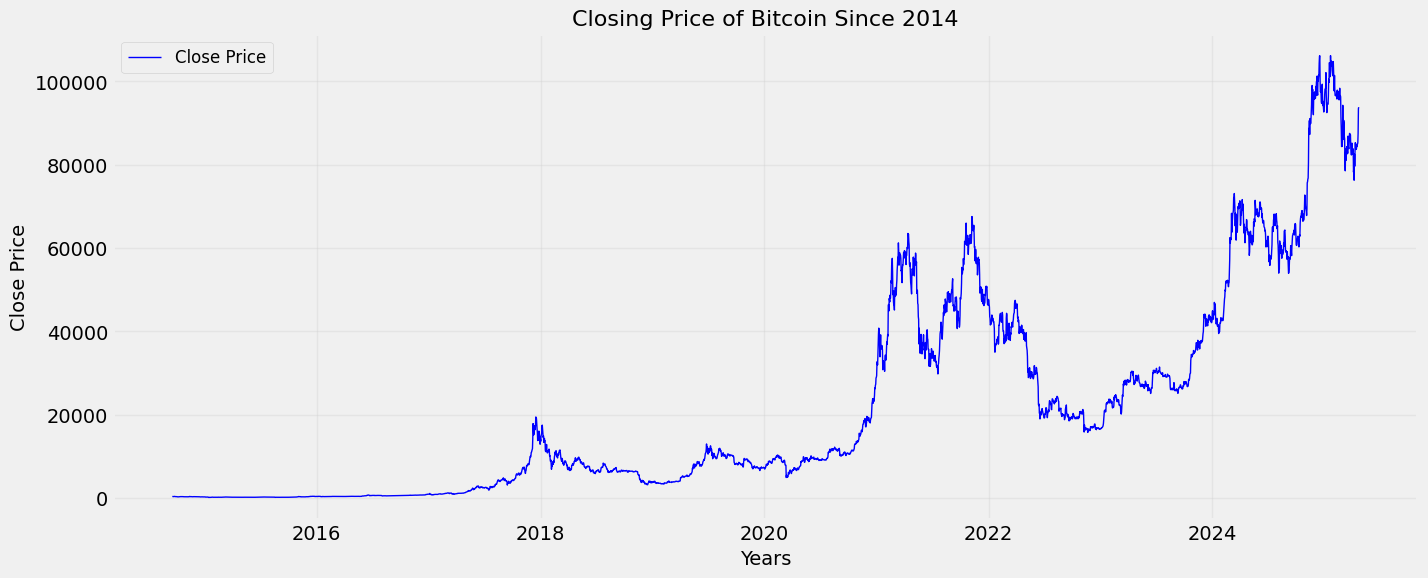

In [11]:
# Plot closing price


plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth=1)
plt.title("Closing Price of Bitcoin Since 2014", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha =0.3)
plt.legend(fontsize=12)
plt.show()


In [12]:
# Moving Average

for i in range(2014, 2025):
  print(i, list(stock_data.index.year).count(i))


2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [13]:
closing_price['MA_365'] = closing_price['Close'].rolling(365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(100).mean()

<ipython-input-13-dc0b1fdf0095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(365).mean()
<ipython-input-13-dc0b1fdf0095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(100).mean()


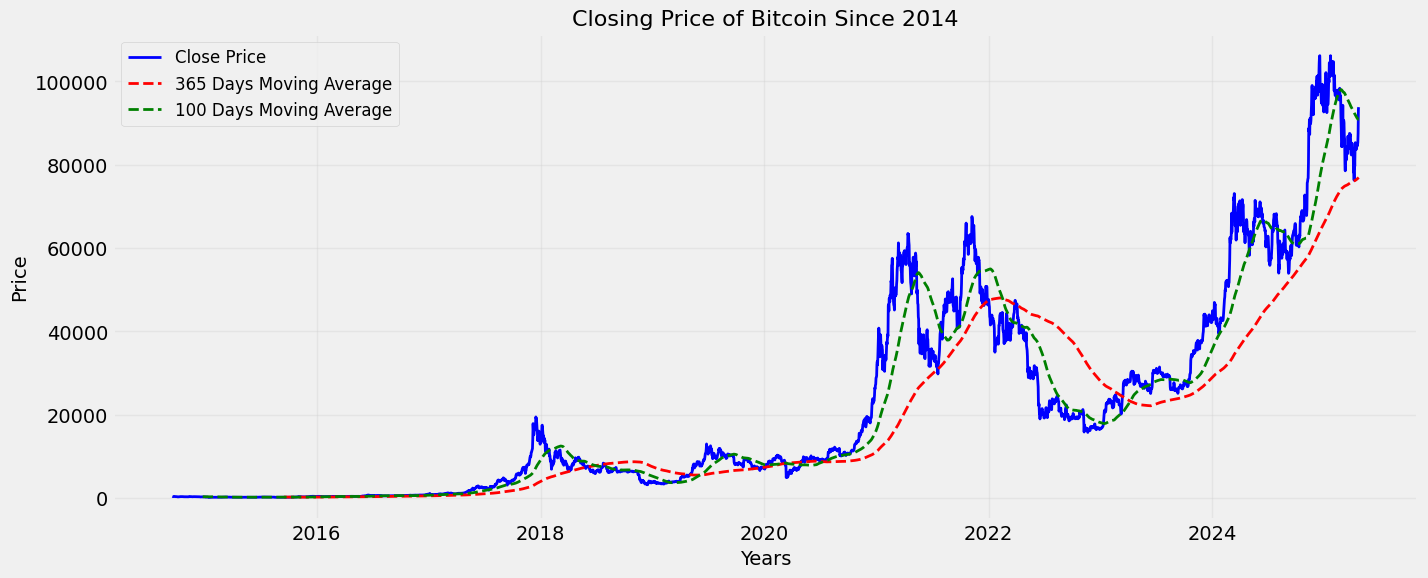

In [14]:
# New Closing Price graph with Moving Averages


plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle="--",linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green', linestyle="--", linewidth=2)

plt.title("Closing Price of Bitcoin Since 2014", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(alpha =0.3)
plt.legend(fontsize=12)
plt.show()

In [15]:
# LSTM -> Long Short Term Memory

# We want to scale the data to be between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [16]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.8242174 ],
       [0.8801114 ],
       [0.88343322]])

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [20]:
# Prepare the data for LSTM
x_data = []
y_data = []

base_days = 100
for i in range(base_days,len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])

x_data = np.array(x_data)
y_data = np.array(y_data)


In [22]:
# Split into train and test sets, Choose 90, 10 split
train_size = int(len(x_data) * 0.9)
x_train,y_train = x_data[:train_size],y_data[:train_size]
x_test, y_test = x_data[train_size:],y_data[train_size:]


In [24]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
]
)

model.compile(optimizer ="adam", loss="mean_squared_error")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train,y_train, batch_size = 5, epochs = 10) # Higher the epochs, higher the accuracy


Epoch 1/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 66s 90ms/step - loss: 0.0015
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - loss: 3.4089e-04
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 57s 85ms/step - loss: 2.0218e-04
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - loss: 1.6037e-04
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - loss: 1.2627e-04
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 91s 95ms/step - loss: 1.0919e-04
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - loss: 1.4377e-04
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - loss: 1.1847e-04
Epoch 9/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 64s 95ms/step - loss: 1.1797e-04
Epoch 10/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 75s 85ms/step - loss: 1.2820e-04


In [26]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


In [27]:
predictions

array([[0.6872791 ],
       [0.6795789 ],
       [0.6510804 ],
       [0.6187814 ],
       [0.6395425 ],
       [0.6142555 ],
       [0.6205224 ],
       [0.59461933],
       [0.61890346],
       [0.62070346],
       [0.63303655],
       [0.631849  ],
       [0.6515277 ],
       [0.6456355 ],
       [0.624589  ],
       [0.6275204 ],
       [0.6191981 ],
       [0.6162061 ],
       [0.6131616 ],
       [0.6207185 ],
       [0.58823144],
       [0.56642354],
       [0.57527405],
       [0.6122393 ],
       [0.62121   ],
       [0.62337464],
       [0.61476815],
       [0.60667497],
       [0.59499836],
       [0.6137671 ],
       [0.5897875 ],
       [0.5914155 ],
       [0.5974383 ],
       [0.6118511 ],
       [0.59789693],
       [0.6466347 ],
       [0.6330192 ],
       [0.6533751 ],
       [0.65041137],
       [0.6439398 ],
       [0.69686   ],
       [0.6788405 ],
       [0.67095304],
       [0.6588089 ],
       [0.6652894 ],
       [0.6719614 ],
       [0.66405064],
       [0.673

In [29]:
plotting_data = pd.DataFrame({
    'Original':inv_y_test.flatten(),
    'Predicted': inv_predictions.flatten()
}, index = closing_price.index[train_size+base_days:])

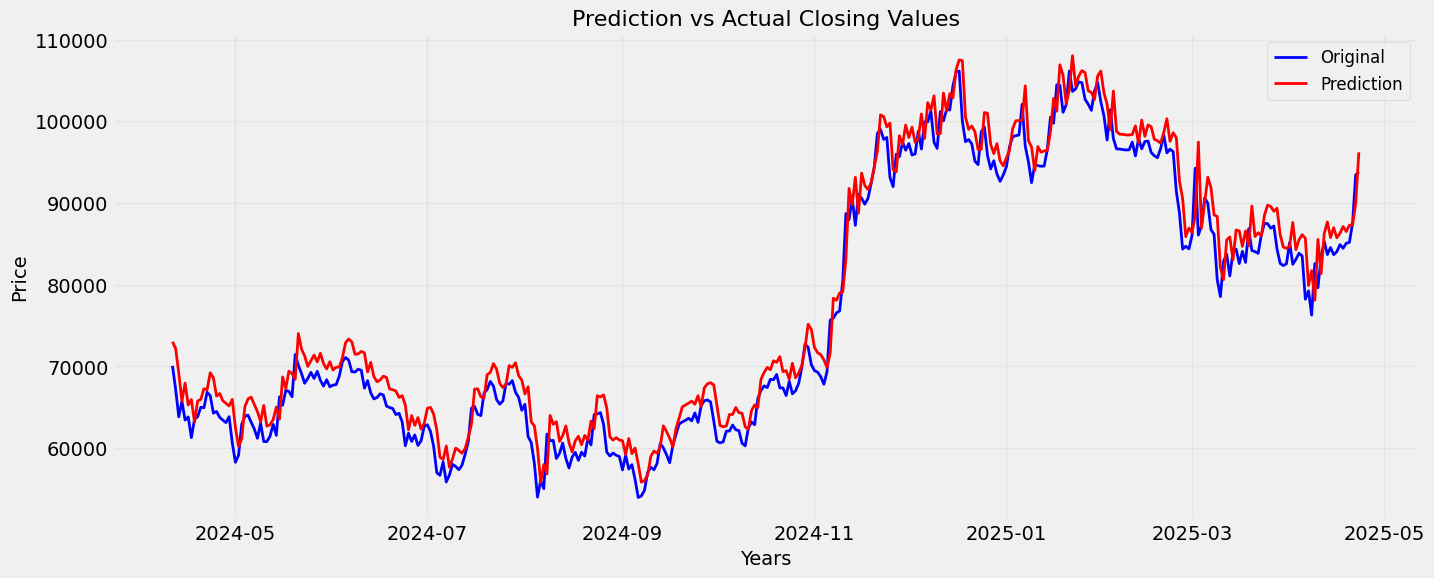

In [31]:

plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Predicted'], label = 'Prediction', color = 'red',linewidth=2)

plt.title("Prediction vs Actual Closing Values", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(alpha =0.3)
plt.legend(fontsize=12)
plt.show()

In [32]:
# Predict Future Days

last_100 = scaled_data[-100:].reshape(1,-1,1)
future_predictions = []

for _ in range(10):
  next_days = model.predict(last_100)
  future_predictions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[:,1:,:], next_days.reshape(1,1,-1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [34]:
future_predictions

[array([[95631.]], dtype=float32),
 array([[97898.56]], dtype=float32),
 array([[99992.33]], dtype=float32),
 array([[101923.66]], dtype=float32),
 array([[103699.48]], dtype=float32),
 array([[105323.1]], dtype=float32),
 array([[106799.336]], dtype=float32),
 array([[108136.21]], dtype=float32),
 array([[109344.22]], dtype=float32),
 array([[110435.266]], dtype=float32)]

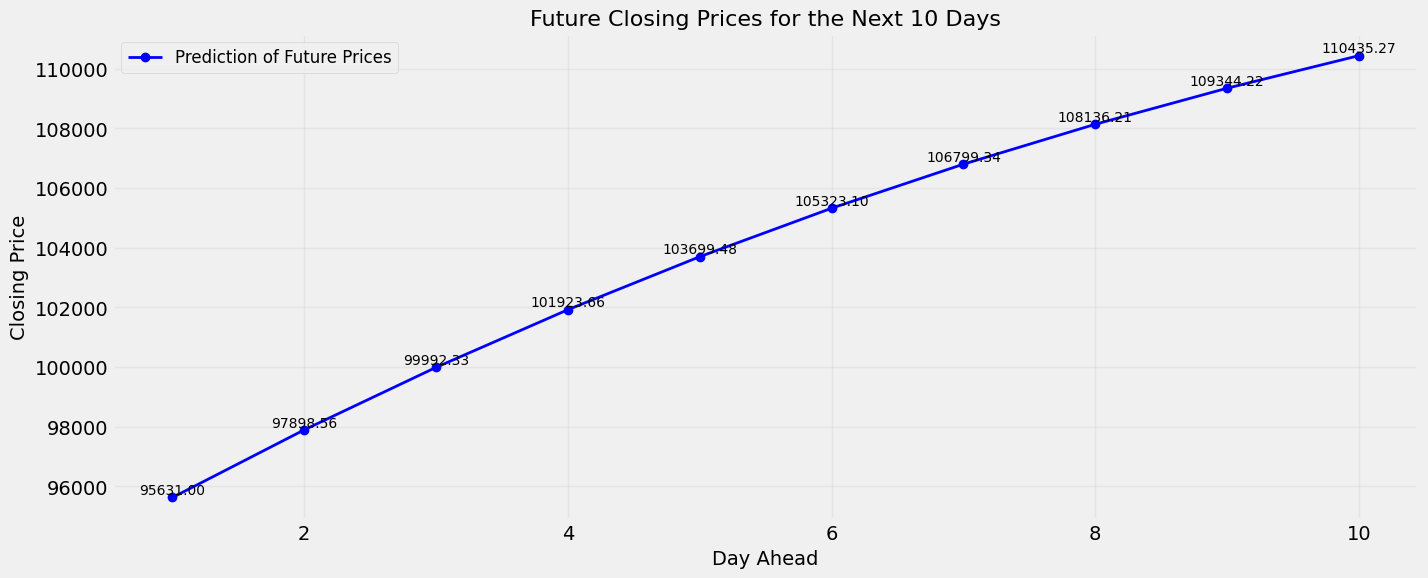

In [38]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize=(15,6))
plt.plot(range(1,11), future_predictions,marker ="o", label = 'Prediction of Future Prices', color = 'blue', linewidth=2)

for i, val in enumerate(future_predictions):
  plt.text(i+1,val,  f'{val:.2f}', fontsize=10, ha='center', va='bottom', color ='black')


plt.title("Future Closing Prices for the Next 10 Days", fontsize=16)
plt.xlabel("Day Ahead", fontsize=14)
plt.ylabel("Closing Price", fontsize=14)
plt.grid(alpha =0.3)
plt.legend(fontsize=12)
plt.show()

In [40]:
model.save("model.keras")